In [1]:
import lightgbm as lgb

In [49]:
import pandas as pd
import numpy as np

In [31]:
from sklearn.compose import ColumnTransformer

In [32]:
from src.utils.functions import load_pickle

In [5]:
ev_hist = pd.read_csv('../reports/lgbm_regressor_eval.csv', index_col=0)

In [6]:
ev_hist

,l2-mean,l2-stdv
0,0.097498,0.002508
1,0.097393,0.002504
2,0.097288,0.002500
3,0.097184,0.002496
4,0.097079,0.002492
...,...,...
2845,0.045246,0.000969
2846,0.045246,0.000970
2847,0.045246,0.000969
2848,0.045246,0.000969


<AxesSubplot: >

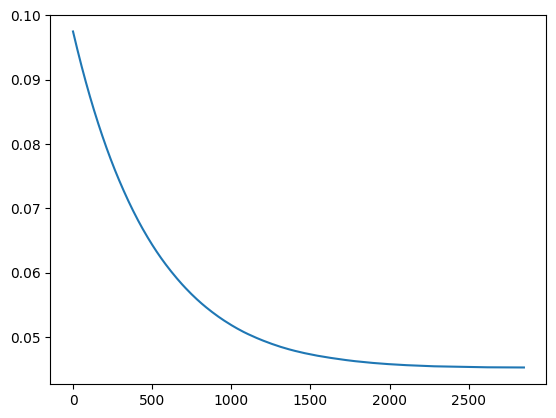

In [7]:
ev_hist['l2-mean'].plot()

In [9]:
(10**0.04)**0.5

1.0471285480508996

In [12]:
model = lgb.Booster(model_file='../models/lgbm_regressor.txt')

In [13]:
model.feature_name()

['neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text',
 'host_is_superhost',
 'accommodates',
 'bedrooms',
 'beds',
 'number_of_reviews']

In [14]:
model.num_feature()

9

In [24]:
ds = lgb.Dataset('../data/processed/test_dataset.bin', free_raw_data=False)

In [25]:
ds.construct()

[LightGBM] [Info] Load from binary file ../data/processed/test_dataset.bin


In [26]:
ds.num_data()

2846

In [27]:
ds.num_feature()

9

In [28]:
ds.get_label()

array([1.908485 , 2.0934217, 1.90309  , ..., 2.20412  , 1.90309  ,
       1.5563025], dtype=float32)

In [33]:
transformer = load_pickle('../models/column_transformer.pkl')

In [34]:
dataset = pd.read_csv('../data/interim/test.csv')

In [35]:
dataset.head()

,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,number_of_reviews,price
0,0.0,Sants-Montjuïc,Entire rental unit,Entire home/apt,5,1 bath,3.0,4.0,93,81
1,0.0,Eixample,Entire rental unit,Entire home/apt,5,1 bath,2.0,3.0,13,124
2,1.0,Eixample,Entire rental unit,Entire home/apt,4,1 bath,2.0,3.0,131,80
3,1.0,Eixample,Entire rental unit,Entire home/apt,4,1 bath,2.0,3.0,238,141
4,0.0,Eixample,Private room in home,Private room,3,1 private bath,2.0,2.0,98,65


In [36]:
features = dataset.drop('price', axis=1)

In [38]:
target = dataset.price

In [41]:
transformer.get_feature_names_out()

array(['categorical__neighbourhood_group_cleansed',
       'categorical__property_type', 'categorical__room_type',
       'categorical__bathrooms_text', 'numerical__host_is_superhost',
       'numerical__accommodates', 'numerical__bedrooms',
       'numerical__beds', 'numerical__number_of_reviews'], dtype=object)

In [42]:
cols = ['neighbourhood_group_cleansed',
       'property_type', 'room_type',
       'bathrooms_text', 'host_is_superhost',
       'accommodates', 'bedrooms',
       'beds', 'number_of_reviews']

In [44]:
f_transformed = pd.DataFrame(transformer.transform(features), columns = cols)

In [45]:
f_transformed

,neighbourhood_group_cleansed,property_type,room_type,bathrooms_text,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews
0,8.0,11.0,0.0,2.0,-0.470141,0.900114,1.540581,1.089246,0.584890
1,1.0,11.0,0.0,2.0,-0.470141,0.900114,0.384022,0.440774,-0.380976
2,1.0,11.0,0.0,2.0,2.127020,0.352152,0.384022,0.440774,1.043677
3,1.0,11.0,0.0,2.0,2.127020,0.352152,0.384022,0.440774,2.335523
4,1.0,27.0,2.0,3.0,-0.470141,-0.195810,0.384022,-0.207699,0.645257
...,...,...,...,...,...,...,...,...,...
2841,0.0,30.0,2.0,6.0,-0.470141,-1.291735,-0.772538,-0.207699,-0.296463
2842,7.0,27.0,2.0,2.0,-0.470141,-0.743773,-0.772538,-0.856171,-0.513783
2843,1.0,11.0,0.0,8.0,-0.470141,0.900114,1.540581,1.737718,-0.537929
2844,7.0,30.0,2.0,3.0,-0.470141,0.352152,0.384022,-0.856171,-0.525856


In [54]:
target = np.log10(target)

<AxesSubplot: >

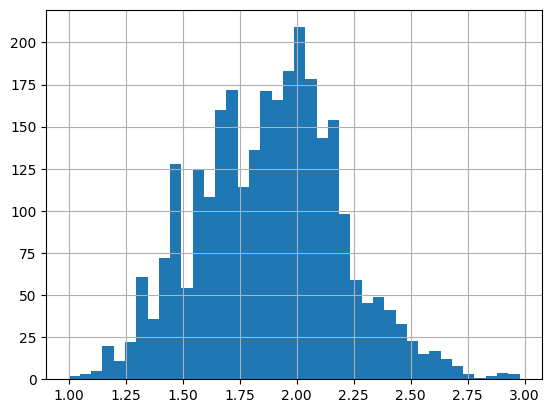

In [59]:
dataset.head()

,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,number_of_reviews,price
0,0.0,Sants-Montjuïc,Entire rental unit,Entire home/apt,5,1 bath,3.0,4.0,93,81
1,0.0,Eixample,Entire rental unit,Entire home/apt,5,1 bath,2.0,3.0,13,124
2,1.0,Eixample,Entire rental unit,Entire home/apt,4,1 bath,2.0,3.0,131,80
3,1.0,Eixample,Entire rental unit,Entire home/apt,4,1 bath,2.0,3.0,238,141
4,0.0,Eixample,Private room in home,Private room,3,1 private bath,2.0,2.0,98,65


In [60]:
f_transformed.join(target)

,neighbourhood_group_cleansed,property_type,room_type,bathrooms_text,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,price
0,8.0,11.0,0.0,2.0,-0.470141,0.900114,1.540581,1.089246,0.584890,1.908485
1,1.0,11.0,0.0,2.0,-0.470141,0.900114,0.384022,0.440774,-0.380976,2.093422
2,1.0,11.0,0.0,2.0,2.127020,0.352152,0.384022,0.440774,1.043677,1.903090
3,1.0,11.0,0.0,2.0,2.127020,0.352152,0.384022,0.440774,2.335523,2.149219
4,1.0,27.0,2.0,3.0,-0.470141,-0.195810,0.384022,-0.207699,0.645257,1.812913
...,...,...,...,...,...,...,...,...,...,...
2841,0.0,30.0,2.0,6.0,-0.470141,-1.291735,-0.772538,-0.207699,-0.296463,1.770852
2842,7.0,27.0,2.0,2.0,-0.470141,-0.743773,-0.772538,-0.856171,-0.513783,1.778151
2843,1.0,11.0,0.0,8.0,-0.470141,0.900114,1.540581,1.737718,-0.537929,2.204120
2844,7.0,30.0,2.0,3.0,-0.470141,0.352152,0.384022,-0.856171,-0.525856,1.903090


In [62]:
pd.DataFrame({'categorical_features': ['neighbourhood_group_cleansed',
       'property_type', 'room_type',
       'bathrooms_text']})

,categorical_features
0,neighbourhood_group_cleansed
1,property_type
2,room_type
3,bathrooms_text
